Aula_5_1

import requisite libraries

In [5]:
# import requisite libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [6]:
# fetch data and separate training data
data = pd.read_excel('proc1a.xls', skiprows = 1, usecols = 'C:AI')
data_train = data.iloc[0:69,]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1in    92 non-null     float64
 1   x2in    92 non-null     float64
 2   x3in    92 non-null     float64
 3   x4in    92 non-null     float64
 4   x5in    92 non-null     float64
 5   x6in    92 non-null     float64
 6   x7in    92 non-null     float64
 7   y1      92 non-null     float64
 8   y2      92 non-null     float64
 9   y3      92 non-null     float64
 10  y4      92 non-null     float64
 11  y5      92 non-null     float64
 12  y6      92 non-null     float64
 13  y7      92 non-null     float64
 14  y8      92 non-null     float64
 15  x8md    92 non-null     float64
 16  x9md    92 non-null     float64
 17  xamd    92 non-null     float64
 18  xbmd    92 non-null     float64
 19  xcmd    92 non-null     float64
 20  xdmd    92 non-null     float64
 21  xemd    92 non-null     float64
 22  xfmd

In [8]:
data

,x1in,x2in,x3in,x4in,x5in,x6in,x7in,y1,y2,y3,...,xgnx,xhnx,xinx,xjnx,xknx,xlnx,xmen,xnen,xoen,xpen
0,0.47,-1.66,-0.19,1.94,0.07,-4.54,-0.09,-1.13,0.62,0.24,...,-0.13,-0.12,0.24,0.22,-0.01,0.27,-0.21,0.38,0.09,-0.11
1,0.05,-0.83,0.04,0.75,0.25,-0.02,-0.60,-0.89,0.68,0.14,...,-0.17,-0.11,0.22,0.05,-0.08,0.18,-0.33,0.34,-0.04,-0.33
2,-0.58,-0.21,-0.08,0.89,0.34,0.12,-0.86,-0.81,0.77,0.12,...,0.07,-0.17,0.20,-0.02,-0.13,0.31,-0.41,0.22,0.04,-0.01
3,-0.90,0.11,0.16,1.43,0.45,0.13,-0.41,-0.70,0.69,0.21,...,0.17,-0.01,0.29,0.07,0.01,0.30,-0.49,0.30,-0.22,0.00
4,-0.78,-0.33,-0.34,1.51,0.50,-0.01,-0.31,-0.38,0.91,0.07,...,0.14,-0.05,0.26,0.06,-0.04,0.33,-0.58,0.23,-0.27,-0.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,-1.37,-0.77,-0.02,-1.36,-0.11,0.22,0.40,-0.26,0.69,-0.30,...,-1.86,0.66,0.69,1.37,1.01,1.18,-0.07,0.28,-1.69,-0.54
88,-1.30,-0.63,-0.19,-1.09,-0.06,-5.70,0.37,-0.38,0.61,-0.23,...,-2.11,1.07,0.95,1.67,1.40,1.28,0.04,0.35,-1.82,-1.13
89,-1.19,-0.03,0.11,-1.05,-0.09,0.09,0.66,-0.01,1.33,-0.97,...,-1.97,0.92,0.83,1.62,1.27,1.10,-4.16,0.37,-1.54,-0.92
90,-0.94,-0.06,0.71,-1.15,-0.06,-5.70,0.65,-0.29,0.79,-0.56,...,-2.07,0.83,0.78,1.28,1.12,1.13,-0.08,0.26,-1.85,-0.81


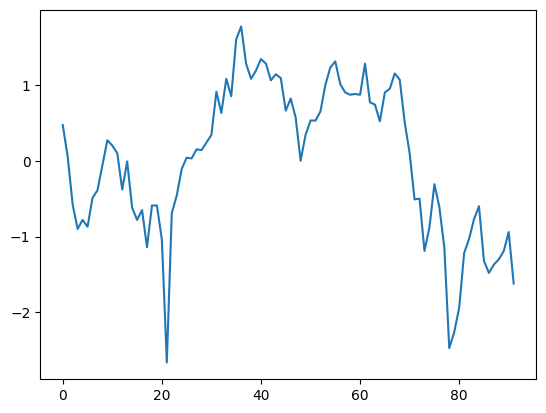

In [9]:
import matplotlib.pyplot as plt

plt.plot(data.index, data["x1in"])

In [10]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1in    69 non-null     float64
 1   x2in    69 non-null     float64
 2   x3in    69 non-null     float64
 3   x4in    69 non-null     float64
 4   x5in    69 non-null     float64
 5   x6in    69 non-null     float64
 6   x7in    69 non-null     float64
 7   y1      69 non-null     float64
 8   y2      69 non-null     float64
 9   y3      69 non-null     float64
 10  y4      69 non-null     float64
 11  y5      69 non-null     float64
 12  y6      69 non-null     float64
 13  y7      69 non-null     float64
 14  y8      69 non-null     float64
 15  x8md    69 non-null     float64
 16  x9md    69 non-null     float64
 17  xamd    69 non-null     float64
 18  xbmd    69 non-null     float64
 19  xcmd    69 non-null     float64
 20  xdmd    69 non-null     float64
 21  xemd    69 non-null     float64
 22  xfmd

In [11]:
data_train

,x1in,x2in,x3in,x4in,x5in,x6in,x7in,y1,y2,y3,...,xgnx,xhnx,xinx,xjnx,xknx,xlnx,xmen,xnen,xoen,xpen
0,0.47,-1.66,-0.19,1.94,0.07,-4.54,-0.09,-1.13,0.62,0.24,...,-0.13,-0.12,0.24,0.22,-0.01,0.27,-0.21,0.38,0.09,-0.11
1,0.05,-0.83,0.04,0.75,0.25,-0.02,-0.60,-0.89,0.68,0.14,...,-0.17,-0.11,0.22,0.05,-0.08,0.18,-0.33,0.34,-0.04,-0.33
2,-0.58,-0.21,-0.08,0.89,0.34,0.12,-0.86,-0.81,0.77,0.12,...,0.07,-0.17,0.20,-0.02,-0.13,0.31,-0.41,0.22,0.04,-0.01
3,-0.90,0.11,0.16,1.43,0.45,0.13,-0.41,-0.70,0.69,0.21,...,0.17,-0.01,0.29,0.07,0.01,0.30,-0.49,0.30,-0.22,0.00
4,-0.78,-0.33,-0.34,1.51,0.50,-0.01,-0.31,-0.38,0.91,0.07,...,0.14,-0.05,0.26,0.06,-0.04,0.33,-0.58,0.23,-0.27,-0.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0.52,1.46,0.76,-1.03,-0.36,0.15,0.16,-1.15,-0.40,0.68,...,0.59,-0.68,-0.45,-1.62,-0.80,-0.66,-0.17,-0.28,0.43,0.90
65,0.90,1.56,0.86,-1.14,-0.09,0.29,0.29,-0.96,-0.24,0.39,...,0.78,-0.63,-0.39,-1.16,-0.60,-0.55,-0.02,-0.12,0.65,0.41
66,0.95,0.01,-0.07,-0.85,-0.28,0.34,-0.35,-0.72,-0.30,0.33,...,0.86,-0.26,-0.16,-0.92,-0.26,-0.60,0.05,-0.04,0.66,-0.19
67,1.15,-0.41,-0.27,-0.85,-0.24,0.19,0.04,-0.84,-0.23,0.38,...,0.81,-0.35,-0.23,-0.95,-0.37,-0.33,-0.07,-0.07,0.78,-0.19


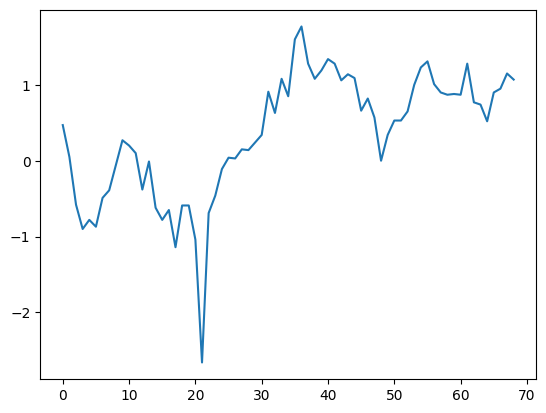

In [12]:
import matplotlib.pyplot as plt
plt.plot(data_train.index, data_train["x1in"])

In [13]:
# normalize data
scaler = StandardScaler()
data_train_normal = scaler.fit_transform(data_train)

In [14]:
# confirm correlation
corr_coef = np.corrcoef(data_train_normal, rowvar = False)
print('Correlation matrix: \n', corr_coef[0:3,0:3]) # printing only a portion

Correlation matrix: 
 [[1.         0.23697456 0.38232242]
 [0.23697456 1.         0.64229595]
 [0.38232242 0.64229595 1.        ]]


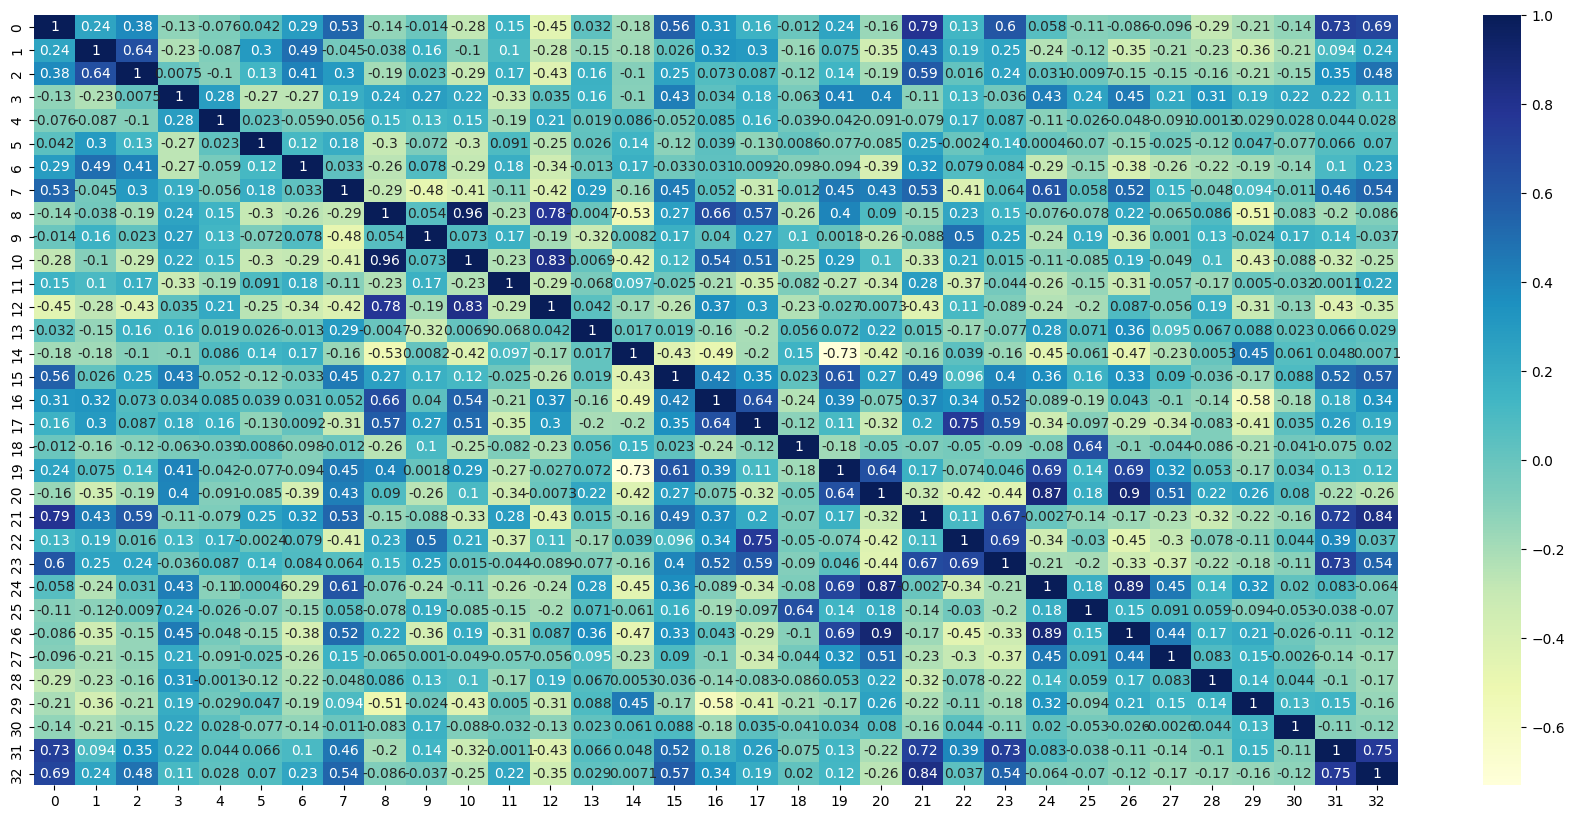

In [ ]:
# Configurando o tamanho da figura
plt.figure(figsize=(22, 10))
# Plotting correlation heatmap
dataplot = sns.heatmap(corr_coef, cmap="YlGnBu", annot=True)

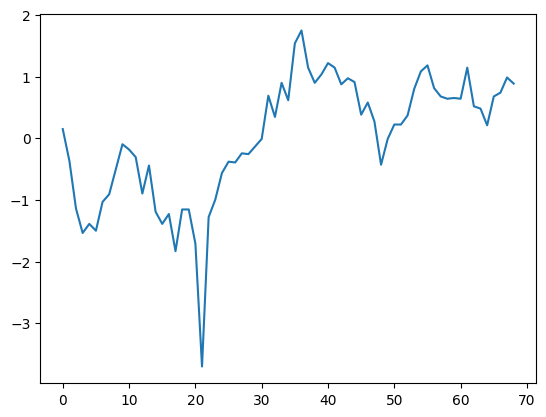

In [16]:
import matplotlib.pyplot as plt
plt.plot(data_train_normal[:,0])

In [17]:
# PCA
pca = PCA()
score_train = pca.fit_transform(data_train_normal)
print(score_train)
#print(pca.explained_variance_ratio_)

[[-3.13567818e+00  6.98524669e-01  4.21512436e+00 ...  6.55633603e-03
  -1.63656288e-02 -4.44619796e-04]
 [-2.41859631e+00  2.03755715e-01  3.19052028e+00 ...  2.19162255e-01
  -6.65076407e-02  2.42339528e-03]
 [-1.84872816e+00  3.21696864e-01  3.74358250e+00 ...  1.21199952e-01
   9.14625408e-02 -2.85745514e-03]
 ...
 [ 2.11264293e+00 -2.37124334e+00 -8.24050777e-02 ... -1.14989382e-01
   9.33187839e-02  2.70253860e-03]
 [ 1.98584160e+00 -2.27975777e+00  2.24309407e-01 ...  7.81995031e-02
   1.05277838e-01 -2.85030836e-04]
 [ 1.52808935e+00 -2.93512763e+00  8.17495002e-02 ... -2.47544074e-02
  -1.46165630e-02 -8.51068689e-04]]


([<matplotlib.axis.XTick at 0x150654b4830>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33')])

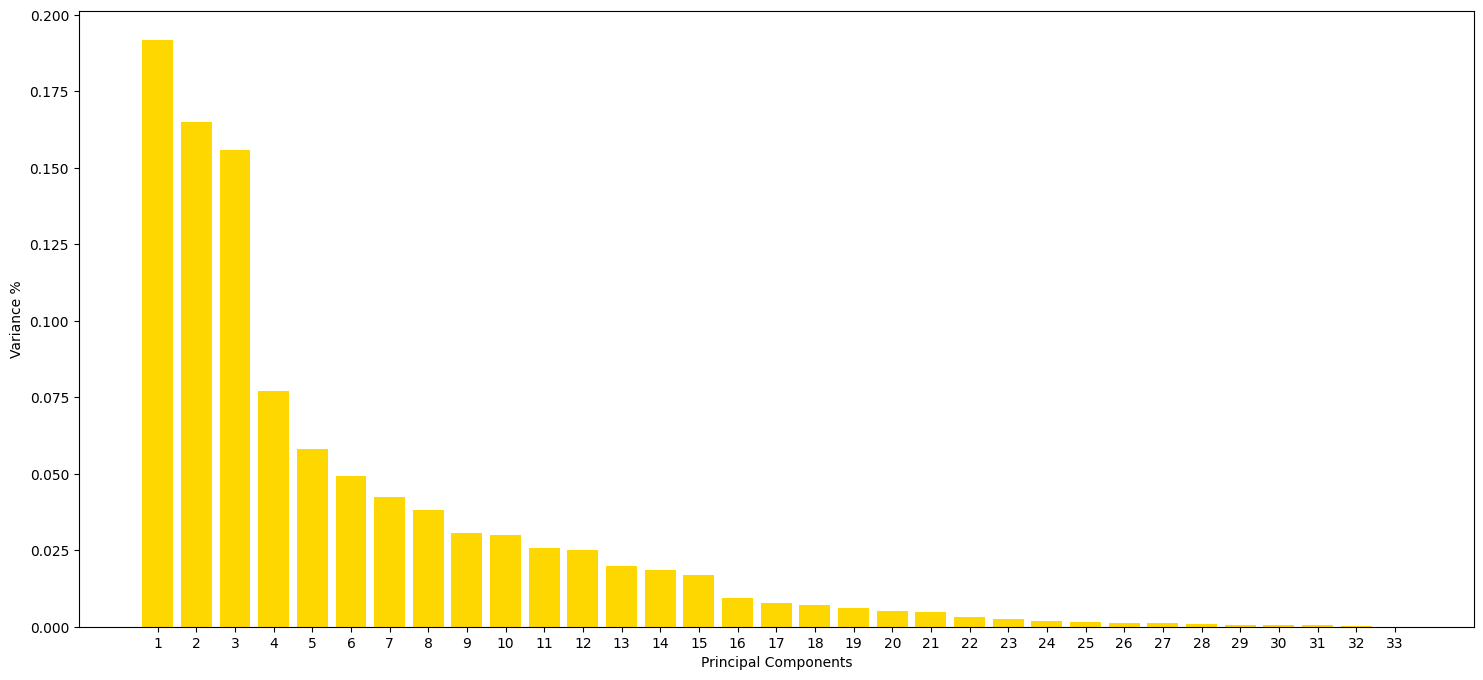

In [31]:
# Configurando o tamanho da figura
plt.figure(figsize=(18, 8))
# Plotting the variances for each PC
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='gold')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

Correlation matrix: 
 [[ 1.00000000e+00  3.71544006e-16 -1.93566117e-16]
 [ 3.71544006e-16  1.00000000e+00 -1.63473731e-17]
 [-1.93566117e-16 -1.63473731e-17  1.00000000e+00]]


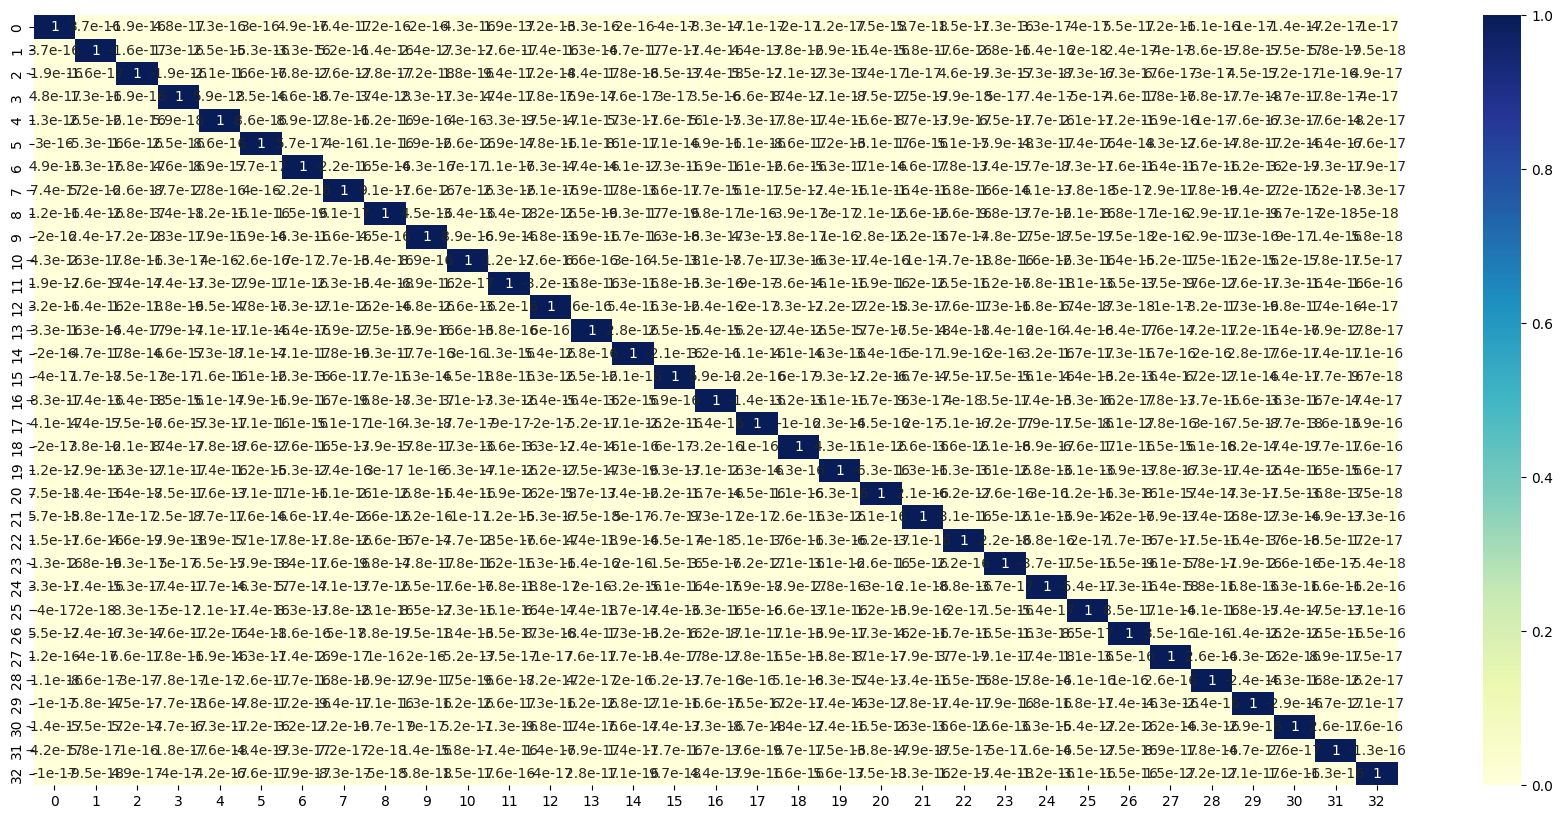

In [34]:
# confirm no correlation
corr_coef = np.corrcoef(score_train, rowvar = False)
print('Correlation matrix: \n', corr_coef[0:3,0:3]) # printing only a portion


# Configurando o tamanho da figura
plt.figure(figsize=(22, 10))
# Plotting correlation heatmap
dataplot = sns.heatmap(corr_coef, cmap="YlGnBu", annot=True)

(Text(0, 0.5, 'Explained variance (in %)'),
 Text(0.5, 0, 'Principal component number'),
 <matplotlib.legend.Legend at 0x15064d30830>)

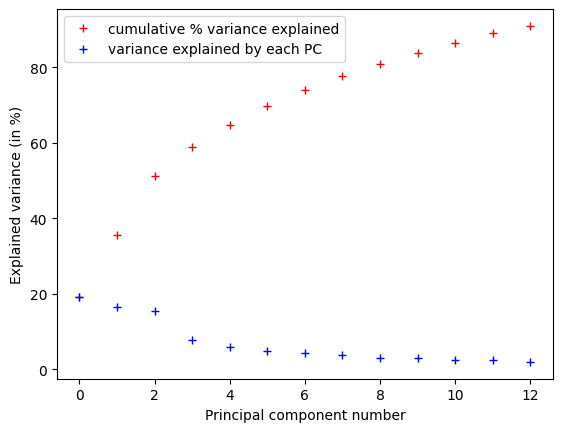

In [52]:
# visualize explained variance
import matplotlib.pyplot as plt
explained_variance = 100*pca.explained_variance_ratio_ # in percentage
cum_explained_variance = np.cumsum(explained_variance) # cumulative % variance explained
plt.figure()
plt.plot(cum_explained_variance, 'r+', label = 'cumulative % variance explained')
plt.plot(explained_variance, 'b+', label = 'variance explained by each PC')
plt.ylabel('Explained variance (in %)'), plt.xlabel('Principal component number'), plt.legend()

In [38]:
# decide # of PCs to retain and compute reduced data in PC space
n_comp = np.argmax(cum_explained_variance >= 90) + 1
score_train_reduced = score_train[:,0:n_comp]
print('Number of PCs cumulatively explaining atleast 90% variance: ', n_comp)

Number of PCs cumulatively explaining atleast 90% variance:  13


In [55]:
# confirm that only about 10% of original information is lost
from sklearn.metrics import r2_score
V_matrix = pca.components_.T
P_matrix = V_matrix[:,0:n_comp]
data_train_normal_reconstruct = np.dot(score_train_reduced, P_matrix.T)
R2_score = r2_score(data_train_normal, data_train_normal_reconstruct)
print('% information lost = ', 100*(1-R2_score))

% information lost =  9.046972754471994


In [40]:
# alternative approach
pca = PCA(n_components = 0.9)
score_train_reduced = pca.fit_transform(data_train_normal)
data_train_normal_reconstruct = pca.inverse_transform(score_train_reduced)
R2_score = r2_score(data_train_normal, data_train_normal_reconstruct)
print('% information lost = ', 100*(1-R2_score))

% information lost =  9.046972754471994


In [57]:
eig_vals = pca.explained_variance_
eig_vals

array([6.42279766, 5.52934815, 5.21780479, 2.57592955, 1.94905677,
       1.6546663 , 1.42445525, 1.27523465, 1.03022819, 1.00510271,
       0.86502803, 0.83941879, 0.66681785])

In [41]:
# calculate T2 for training data
lambda_k = np.diag(pca.explained_variance_[0:n_comp]) # eigenvalue = explained variance
lambda_k_inv = np.linalg.inv(lambda_k)
T2_train = np.zeros((data_train_normal.shape[0],))
for i in range(data_train_normal.shape[0]):
    T2_train[i] = np.dot(np.dot(score_train_reduced[i,:],lambda_k_inv),score_train_reduced[i,:].T)

In [19]:
print('n_comp= ', n_comp)
print('lambda_k= ', lambda_k)
print('T2_train= ', T2_train)

n_comp=  13
lambda_k=  [[6.42279766 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         5.52934815 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         5.21780479 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         2.57592955 0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         1.94905677 0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         1.6546663
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  1.42445525 0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.      

In [43]:
print('T2_train= ', T2_train)

T2_train=  [57.04182661  5.12087848  6.74030167  6.93176786  8.83660963 10.45144146
  5.8436627   3.59649096 35.59381961 16.49196953  4.78840472 18.77604852
  4.5212077   4.23875877  3.78860165  4.55534708  5.69992537  6.86703739
  7.72152046  9.55301822  9.97046982 10.4304108  24.49159349 15.05239577
  7.57730745  7.77972091  8.47035133 12.44064841  9.82312972  5.3244029
  4.62227169 32.46047162 58.27487093  5.32564172  6.47680701  8.97376302
 10.56774754  9.48071086  6.33028559  5.86751455 60.43940421  4.81680417
 51.98181689  4.16010944  6.86020578  5.97325037  6.40637146  7.14024202
  6.49804284 19.85232656  5.79804153  6.19516916  4.99580626  7.18022722
  8.55023494  6.1649481   4.81139351  3.33717336  5.39395856  6.59880028
 52.15551929  7.18773954  8.09115963  8.00307591 55.09440641  6.87155755
  8.04092254  7.60637134 10.89576761]


Text(0, 0.5, 'T2')

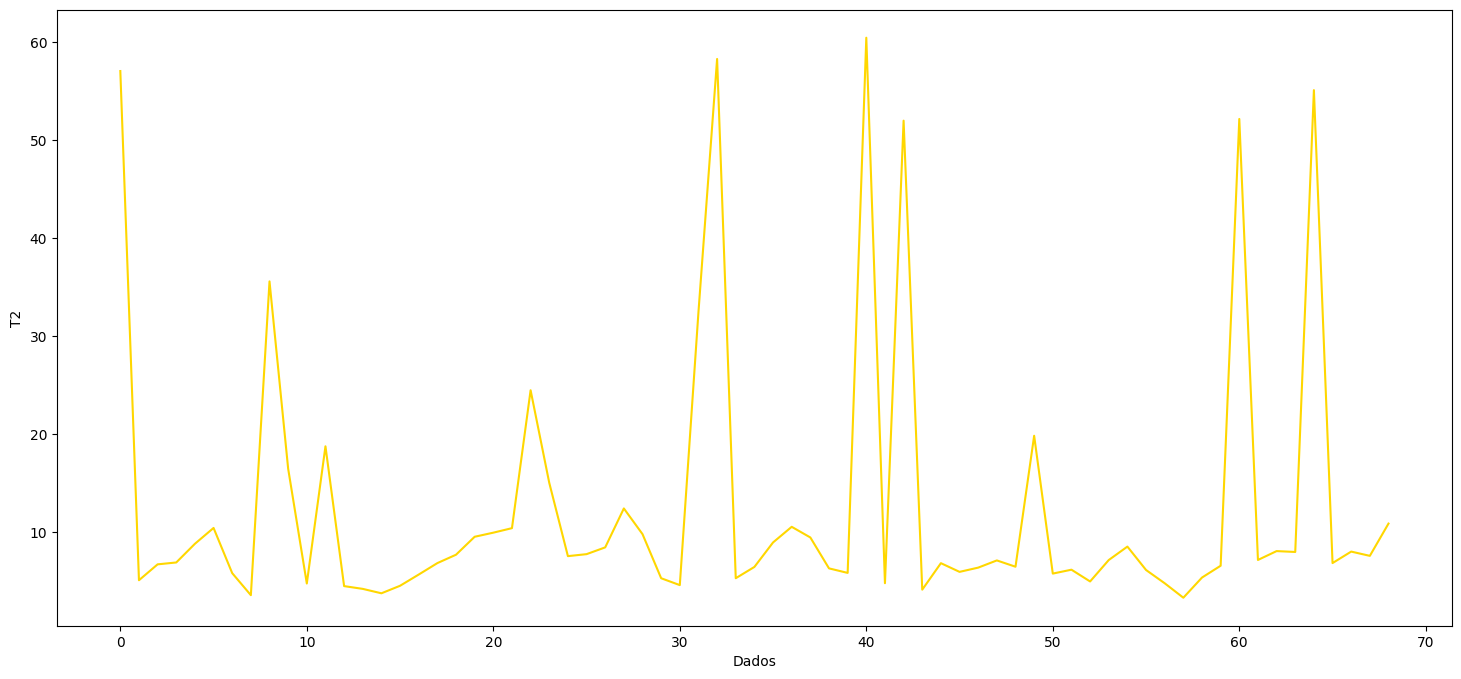

In [45]:
# Configurando o tamanho da figura
plt.figure(figsize=(18, 8))

plt.plot(T2_train, color='gold')
plt.xlabel('Dados')
plt.ylabel('T2')


In [46]:
# calculate Q for training data
error_train = data_train_normal - data_train_normal_reconstruct
Q_train = np.sum(error_train*error_train, axis = 1)

In [21]:
print('data_train_normal= ', data_train_normal)
print('data_train_normal_reconstruct= ', data_train_normal_reconstruct)
print('error_train= ', error_train) 
print('Q_train= ', Q_train)

data_train_normal=  [[ 0.14859111 -1.68955301 -0.33388245 ...  0.42658566 -0.47635436
  -0.50909336]
 [-0.36773627 -0.8845555  -0.10199123 ...  0.38314003 -0.77185219
  -0.77530202]
 [-1.14222734 -0.28323206 -0.22297795 ...  0.25280316 -0.59000737
  -0.38808943]
 ...
 [ 0.73867954 -0.06985922 -0.21289573 ... -0.0295934   0.81928997
  -0.60589651]
 [ 0.98454972 -0.47720736 -0.41454027 ... -0.06217761  1.09205719
  -0.60589651]
 [ 0.88620165 -1.37919253 -1.10013173 ... -0.0404548   0.66017575
  -0.90840635]]
data_train_normal_reconstruct=  [[-0.01417356 -2.08039808 -0.67408136 ...  0.19936655 -0.4451065
  -0.33456228]
 [-1.02271332 -0.51197839 -0.55500546 ...  0.40354173 -1.1144107
  -0.69331188]
 [-1.0379027  -0.31529089 -0.50843974 ...  0.18331896 -1.01749818
  -0.46156245]
 ...
 [ 0.4370115  -0.06037524 -0.34207171 ... -0.08899288  0.8250002
  -0.16558535]
 [ 0.55157694 -0.16143918 -0.43645482 ... -0.06431489  0.79402729
  -0.12686722]
 [ 0.53879364 -0.6078483  -0.93939391 ...  0.0741

Text(0, 0.5, 'Q')

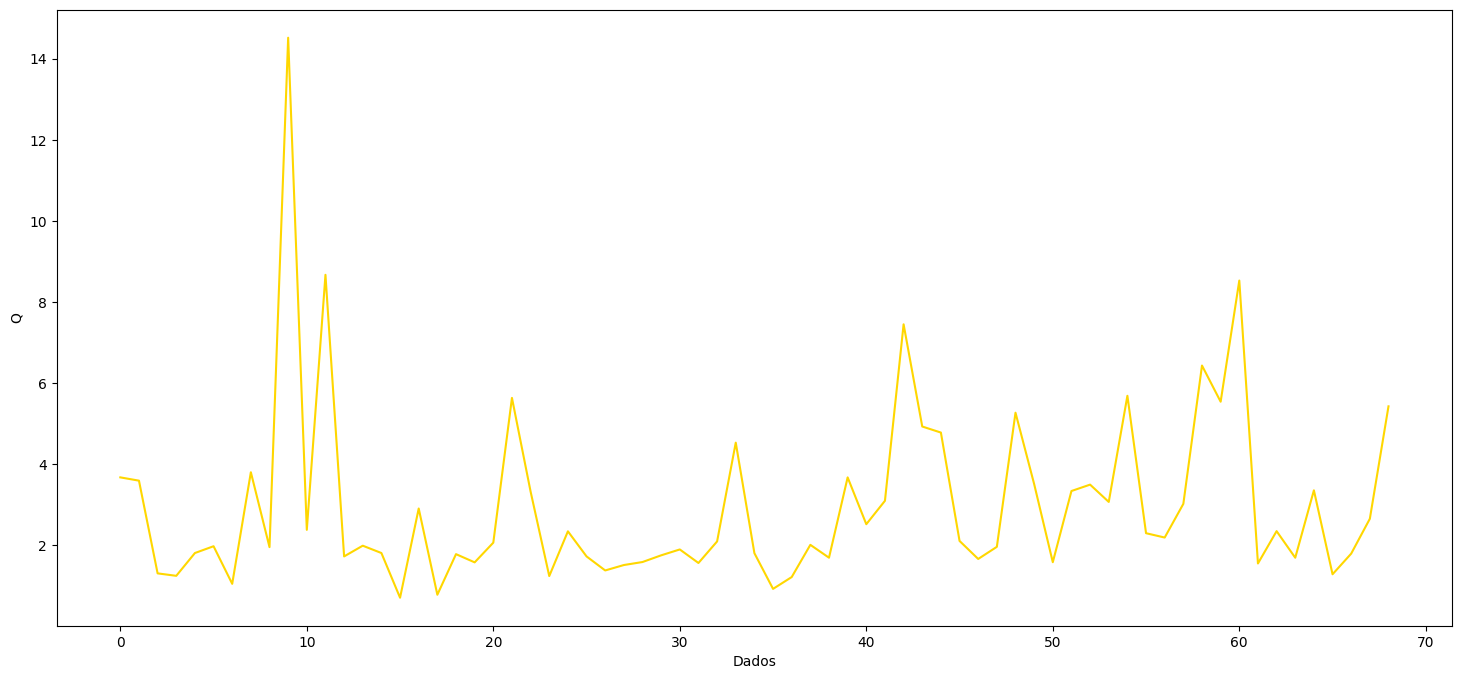

In [47]:
# Configurando o tamanho da figura
plt.figure(figsize=(18, 8))

plt.plot(Q_train, color='gold')
plt.xlabel('Dados')
plt.ylabel('Q')

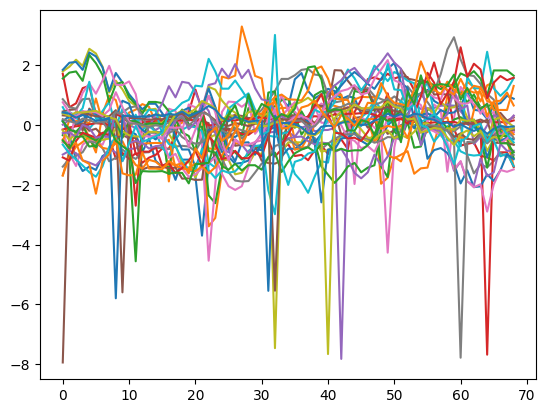

In [22]:
plt.plot(data_train_normal)

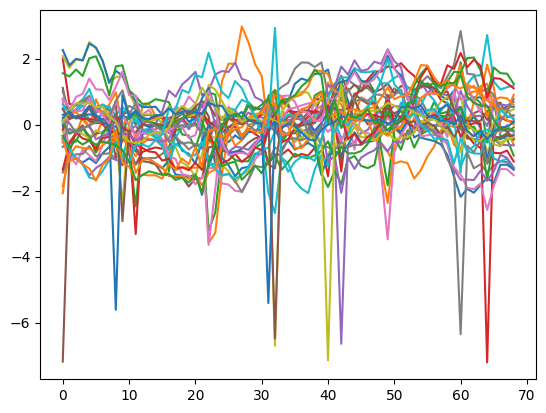

In [23]:
plt.plot(data_train_normal_reconstruct)

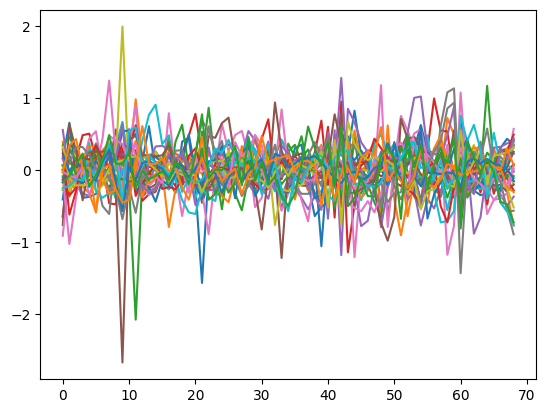

In [24]:
plt.plot(error_train)

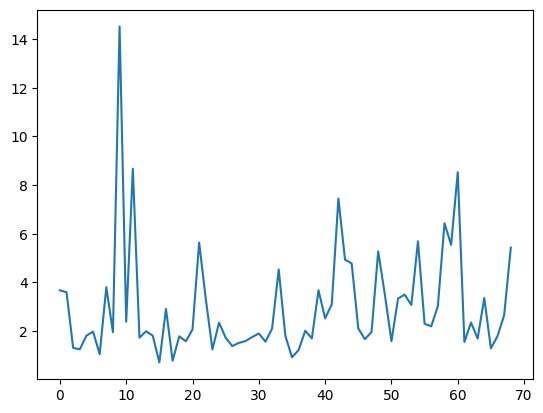

In [25]:
plt.plot(Q_train)

In [48]:
# T2 control limit
import scipy.stats
N = data_train_normal.shape[0]
k = n_comp
alpha = 0.01 # 99% control limit
T2_CL = k*(N**2-1)*scipy.stats.f.ppf(1-alpha,k,N-k)/(N*(N-k))

In [49]:
print('T2 control limit= ', T2_CL)

T2 control limit=  39.48291089245049


In [56]:
print('eig_vals: ', pca.explained_variance_)


eig_vals:  [6.42279766 5.52934815 5.21780479 2.57592955 1.94905677 1.6546663
 1.42445525 1.27523465 1.03022819 1.00510271 0.86502803 0.83941879
 0.66681785]


In [54]:
# Q control limit
eig_vals = pca.explained_variance_
print('eig_vals: ', eig_vals)   
m = data_train_normal.shape[1]
print('m: ', m)
print('k: ', k)
theta1 = np.sum(eig_vals[k:])
theta2 = np.sum([eig_vals[j]**2 for j in range(k,m)])
theta3 = np.sum([eig_vals[j]**3 for j in range(k,m)])
h0 = 1-2*theta1*theta3/(3*theta2**2)
z_alpha = scipy.stats.norm.ppf(1-alpha)
Q_CL = theta1*(z_alpha*np.sqrt(2*theta2*h0**2)/theta1+ 1 + theta2*h0*(1-h0)/theta1**2)**2

eig_vals:  [6.42279766 5.52934815 5.21780479 2.57592955 1.94905677 1.6546663
 1.42445525 1.27523465 1.03022819 1.00510271 0.86502803 0.83941879
 0.66681785]
m:  33
k:  13


IndexError: index 13 is out of bounds for axis 0 with size 13

In [ ]:
print('Q control limit= ', Q_CL)

Q control limit=  3.758018322231988


(Text(0.5, 0, 'Sample #'), Text(0, 0.5, 'Q for training data'))

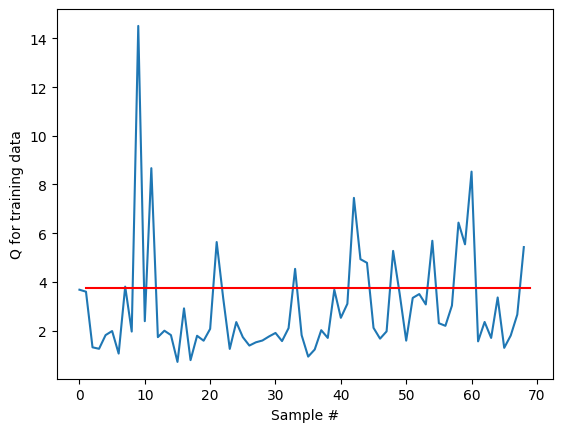

In [ ]:
# Q_train plot with CL 
plt.figure() 
plt.plot(Q_train) 
plt.plot([1,len(Q_train)],[Q_CL,Q_CL], color='red') 
plt.xlabel('Sample #'), plt.ylabel('Q for training data') 

(Text(0.5, 0, 'Sample #'), Text(0, 0.5, 'T$^2$ for training data'))

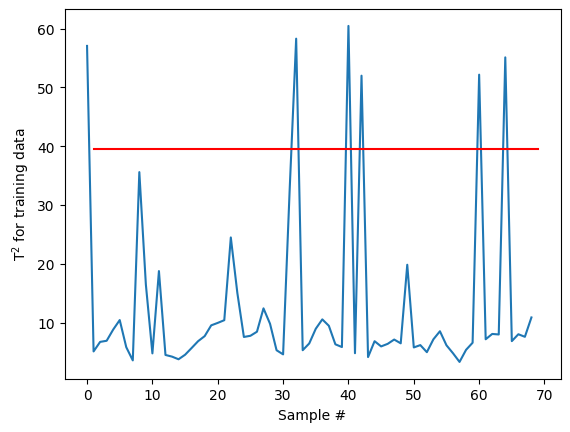

In [ ]:
# T2_train plot with CL 
plt.figure() 
plt.plot(T2_train) 
plt.plot([1,len(T2_train)],[T2_CL,T2_CL], color='red') 
plt.xlabel('Sample #'), plt.ylabel('T$^2$ for training data')

In [ ]:
# get test data, normalize it 
data_test = data.iloc[69:,] 
data_test_normal = scaler.transform(data_test) # using scaling parameters from training data 

In [ ]:
# compute scores and reconstruct 
score_test = pca.transform(data_test_normal) 
score_test_reduced = score_test[:,0:n_comp] 
data_test_normal_reconstruct = np.dot(score_test_reduced, P_matrix.T) 

In [ ]:
# calculate T2_test 
T2_test = np.zeros((data_test_normal.shape[0],)) 
for i in range(data_test_normal.shape[0]): # eigenvalues from training data are used 
    T2_test[i] = np.dot(np.dot(score_test_reduced[i,:],lambda_k_inv),score_test_reduced[i,:].T)

In [ ]:
# calculate Q_test 
error_test = data_test_normal_reconstruct - data_test_normal 
Q_test = np.sum(error_test*error_test, axis = 1)

Diagnóstico de Falhas

Text(0, 0.5, 'T$^2$ contribution plot')

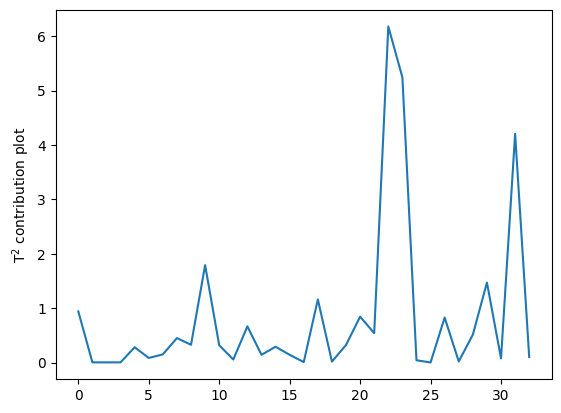

In [ ]:
# T2 contribution 
sample = 85 - 69 
data_point = np.transpose(data_test_normal[sample-1,]) 
D = np.dot(np.dot(P_matrix,lambda_k_inv),P_matrix.T) 
T2_contri = np.dot(scipy.linalg.sqrtm(D),data_point)**2 # vector of contributions 
plt.figure() 
plt.plot(T2_contri)
plt.ylabel('T$^2$ contribution plot') 


([<matplotlib.lines.Line2D at 0x1ac01789970>],
 Text(0, 0.5, 'SPE contribution plot'))

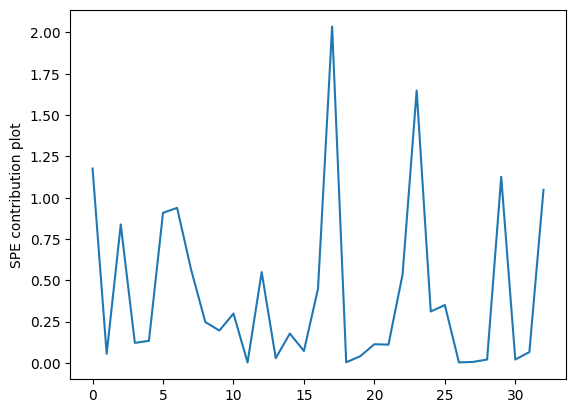

In [ ]:
# SPE contribution 
error_test_sample = error_test[sample-1,] 
SPE_contri = error_test_sample*error_test_sample # vector of contributions
plt.figure() 
plt.plot(SPE_contri), plt.ylabel('SPE contribution plot')

PCA Dinâmico (DPCA)

In [ ]:
# augment training data 
lag = 5 
N = data_train.shape[0]
m = data_train.shape[1] 
data_train_augmented = np.zeros((N-lag,(lag+1)*m)) 
for sample in range(lag, N): 
    dataBlock = data_train.iloc[sample-lag:sample+1,:].values # pandas dataframe to NumPy array 
    data_train_augmented[sample-lag,:] = np.reshape(dataBlock, (1,-1), order = 'F')
